In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('births.csv')

In [4]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
df.year.unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [8]:
df['decade'] = 10 * (df['year'] // 10)
df.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [9]:
df_pivot = df.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')
df_pivot

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [10]:
df_group = df.groupby(['decade', 'gender'])['births'].sum().unstack()
df_group

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

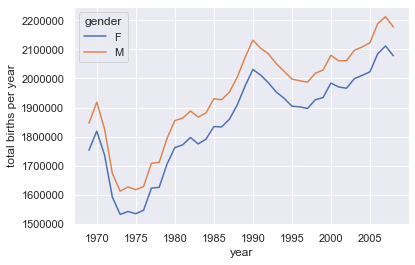

In [11]:
df.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel('total births per year')

In [12]:
# 消除异常值的影响，比如控制，错误输入值
# 使用sigma消除法划定范围
# 样本均值的稳定性估计(robust estimate)，其中0.74是指标准正态分布的分位数间距
quartiles = np.percentile(df['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [13]:
# @符号表示'这是一个变量名称而不是一个列名称'，@只能在DataFrame中使用
# 划定范围
births = df.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [14]:
# 解决SettingWithCopyWarning报警问题，链式操作很容易出现SettingWithCopyWarning
df_copy = births.copy()
df_copy

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.4+ MB


In [17]:
df_copy.index = pd.to_datetime(10000 * df_copy.year + 100 * df_copy.month + df_copy.day, format = '%Y%m%d')
df_copy['dayofweek'] = df_copy.index.dayofweek

In [18]:
df5 = df_copy.pivot_table(values = 'births', index='dayofweek', columns = 'decade', aggfunc = 'mean')
df5

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


In [19]:
df5.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='dayofweek')

Text(0, 0.5, 'mean births by day')

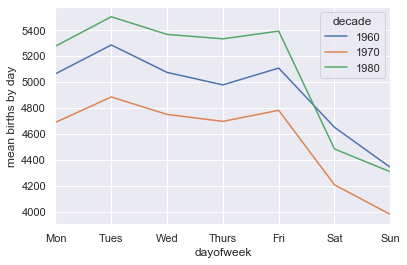

In [20]:
ax = df5.plot()
ax.set_xlim(0,6)
ax.set_xticks(df5.index)
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
ax.set_ylabel('mean births by day')

In [21]:
df_copy

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1.0,F,4046,1960,2
1969-01-01,1969,1,1.0,M,4440,1960,2
1969-01-02,1969,1,2.0,F,4454,1960,3
1969-01-02,1969,1,2.0,M,4548,1960,3
1969-01-03,1969,1,3.0,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29.0,M,5944,1980,3
1988-12-30,1988,12,30.0,F,5742,1980,4
1988-12-30,1988,12,30.0,M,6095,1980,4
1988-12-31,1988,12,31.0,F,4435,1980,5


In [22]:
# 各个年份平均每天的出生人数pivot_table()默认聚合函数为mean
births_by_date = df_copy.pivot_table(values='births', index = [df_copy.index.month, df_copy.index.day], aggfunc = 'mean')
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [23]:
# 虚构一个年份，与月和日组合成新索引
pd.date_range(start = '2012-01-01', end = '2012-12-31')

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [24]:
pd.date_range(start = '2012-01-01', periods = 366, freq = 'D')

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [25]:
births_by_date.index

MultiIndex([( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ( 1, 10),
            ...
            (12, 22),
            (12, 23),
            (12, 24),
            (12, 25),
            (12, 26),
            (12, 27),
            (12, 28),
            (12, 29),
            (12, 30),
            (12, 31)],
           length=366)

In [26]:
births_by_date.index = pd.date_range(start = '2020-01-01', periods=366, freq = 'D')
births_by_date.head()

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


In [27]:
births_by_date.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

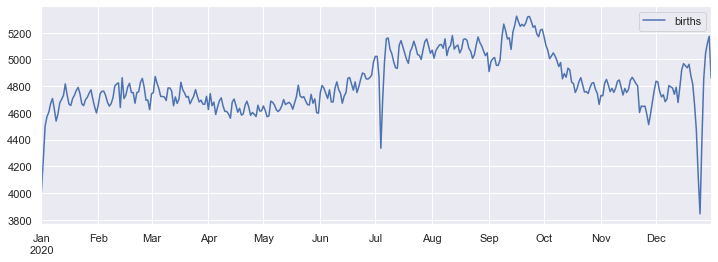

In [28]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)